In [2]:
import numpy as np
import pandas as pd

In [13]:
data_path = '../data/'
df = pd.read_csv(data_path + 'ner.zip', encoding="latin1")

In [18]:
df.shape

(768960, 25)

In [16]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
lemma,thousand,of,demonstr,have,march
next-lemma,of,demonstr,have,march,through
next-next-lemma,demonstr,have,march,through,london
next-next-pos,NNS,VBP,VBN,IN,NNP
next-next-shape,lowercase,lowercase,lowercase,lowercase,capitalized
next-next-word,demonstrators,have,marched,through,London
next-pos,IN,NNS,VBP,VBN,IN
next-shape,lowercase,lowercase,lowercase,lowercase,lowercase
next-word,of,demonstrators,have,marched,through


In [20]:
df.dtypes

Unnamed: 0           int64
lemma               object
next-lemma          object
next-next-lemma     object
next-next-pos       object
next-next-shape     object
next-next-word      object
next-pos            object
next-shape          object
next-word           object
pos                 object
prev-iob            object
prev-lemma          object
prev-pos            object
prev-prev-iob       object
prev-prev-lemma     object
prev-prev-pos       object
prev-prev-shape     object
prev-prev-word      object
prev-shape          object
prev-word           object
sentence_idx       float64
shape               object
word                object
tag                 object
dtype: object

In [127]:
df.rename(columns={'Unnamed: 0': 'row-num'}, inplace=True)

## Check for missing values

In [128]:
df.isnull().sum()

row-num            0
lemma              0
next-lemma         0
next-next-lemma    0
next-next-pos      0
next-next-shape    0
next-next-word     0
next-pos           0
next-shape         1
next-word          1
pos                1
prev-iob           1
prev-lemma         1
prev-pos           1
prev-prev-iob      1
prev-prev-lemma    1
prev-prev-pos      1
prev-prev-shape    1
prev-prev-word     1
prev-shape         1
prev-word          1
sentence_idx       1
shape              1
word               1
tag                1
dtype: int64

Let's check and see if all of these missing values are in the same row

In [140]:
# Find index of row with missing value in 'word'
miss_idx = int(df[df['word'].isnull()]['row-num'])

# Print the row above and below
df[miss_idx-1:miss_idx+2]

,row-num,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
407597,407597,of,domin,countri,NNS,lowercase,countries,VBG,lowercase,domineering,...,the,DT,lowercase,the,lowercase,mercy,18616.0,lowercase,of,O
407598,407598,domin,countri,.,.,punct,.nister,O,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407599,687214,pascal,yoadimadji,has,VBZ,lowercase,has,NNP,capitalized,Yoadimadji,...,prime,JJ,capitalized,Prime,capitalized,Minister,31399.0,capitalized,Pascal,B-per


In [143]:
df.dropna(inplace=True)

In [144]:
def vars_with(df, token):
    var_matches = []
    for var in df.columns:
        if token in var:
            var_matches.append(var)
            
    return var_matches

In [48]:
pos_vars = vars_with(df, 'pos')
df[pos_vars[0]].value_counts()

NN          100093
IN           84417
NNP          80463
DT           60104
JJ           50994
NNS          49071
__END2__     35175
__END1__     35173
.            35087
VBD          26212
VBN          23574
,            22651
VB           17741
TO           16828
CD           16785
CC           16300
VBZ          16062
VBG          13512
RB           13218
VBP          10434
PRP           7144
POS           6975
PRP$          6028
MD            4916
``            2703
WDT           2690
JJR           1986
JJS           1921
WP            1855
RP            1801
NNPS          1788
WRB           1549
$              748
RBR            610
:              584
RRB            467
LRB            460
EX             306
RBS            223
;              149
PDT             87
WP$             66
UH              10
Name: next-next-pos, dtype: int64

In [115]:
from wordcloud import WordCloud

def df2text(df):
    s = []
    i = 1
    for w in df:
        s.append(str(w))
    
    return ' '.join(s)

def draw_word_cloud(df, width=800, height=400):
    text = df2text(df)
    word_cloud = WordCloud(background_color='white', width=width, height=height).generate(text)
    
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [4,2]
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

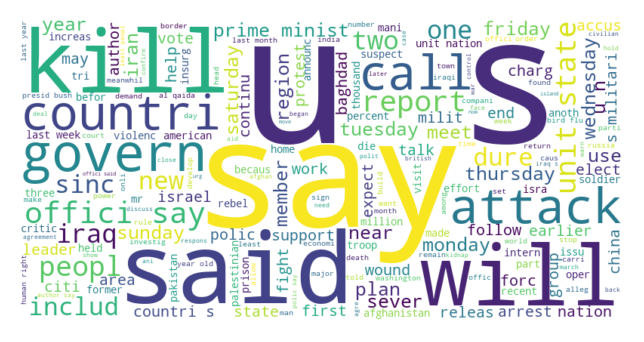

In [117]:
draw_word_cloud(df['lemma'])

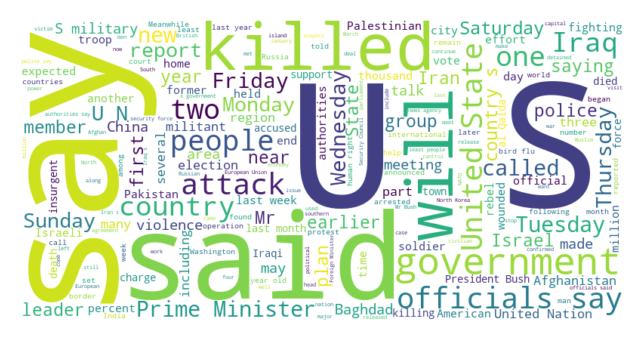

In [116]:
draw_word_cloud(df['word'])